In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, precision_score,roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import time
from matplotlib.colors import ListedColormap
import warnings

# Ignorar todos los warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargar el dataset
file_path = "diabetes_dataset.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset para familiarizarse
print("Primeras 5 filas del dataset:")
print(df.head())

Primeras 5 filas del dataset:
   Unnamed: 0  Age     Sex Ethnicity   BMI  Waist_Circumference  \
0           0   58  Female     White  35.8                 83.4   
1           1   48    Male     Asian  24.1                 71.4   
2           2   34  Female     Black  25.0                113.8   
3           3   62    Male     Asian  32.7                100.4   
4           4   27  Female     Asian  33.5                110.8   

   Fasting_Blood_Glucose  HbA1c  Blood_Pressure_Systolic  \
0                  123.9   10.9                      152   
1                  183.7   12.8                      103   
2                  142.0   14.5                      179   
3                  167.4    8.8                      176   
4                  146.4    7.1                      122   

   Blood_Pressure_Diastolic  ...  Cholesterol_HDL  Cholesterol_LDL   GGT  \
0                       114  ...             50.2             99.2  37.5   
1                        91  ...             62.0     

# LIMPIEZA DE DATOS

### 1. Verificar valores nulos en el dataset

In [3]:
print("Valores nulos en cada columna:")
print(df.isnull().sum())

Valores nulos en cada columna:
Unnamed: 0                          0
Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64


In [4]:
print(df.dtypes)

Unnamed: 0                         int64
Age                                int64
Sex                               object
Ethnicity                         object
BMI                              float64
Waist_Circumference              float64
Fasting_Blood_Glucose            float64
HbA1c                            float64
Blood_Pressure_Systolic            int64
Blood_Pressure_Diastolic           int64
Cholesterol_Total                float64
Cholesterol_HDL                  float64
Cholesterol_LDL                  float64
GGT                              float64
Serum_Urate                      float64
Physical_Activity_Level           object
Dietary_Intake_Calories            int64
Alcohol_Consumption               object
Smoking_Status                    object
Family_History_of_Diabetes         int64
Previous_Gestational_Diabetes      int64
dtype: object


### 2. Limpiar los tipos de datos inconsistentes

In [5]:
# Eliminar columna de índice no necesaria
df = df.drop(columns=['Unnamed: 0'])

# Verificar tipos de datos después de la conversión
print("\nTipos de datos después de la limpieza:")
print(df.dtypes)


Tipos de datos después de la limpieza:
Age                                int64
Sex                               object
Ethnicity                         object
BMI                              float64
Waist_Circumference              float64
Fasting_Blood_Glucose            float64
HbA1c                            float64
Blood_Pressure_Systolic            int64
Blood_Pressure_Diastolic           int64
Cholesterol_Total                float64
Cholesterol_HDL                  float64
Cholesterol_LDL                  float64
GGT                              float64
Serum_Urate                      float64
Physical_Activity_Level           object
Dietary_Intake_Calories            int64
Alcohol_Consumption               object
Smoking_Status                    object
Family_History_of_Diabetes         int64
Previous_Gestational_Diabetes      int64
dtype: object


### 3. Detección de valores duplicados

In [6]:
print(f"\nCantidad de filas duplicadas: {df.duplicated().sum()}")

# Eliminar duplicados si existen
df_cleaned = df.drop_duplicates()


Cantidad de filas duplicadas: 0


# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

### Descripción estadística general de las columnas numéricas

In [7]:
# Mostrar información básica
print("Información del dataset:")

df = df_cleaned
print(df.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Sex                            10000 non-null  object 
 2   Ethnicity                      10000 non-null  object 
 3   BMI                            10000 non-null  float64
 4   Waist_Circumference            10000 non-null  float64
 5   Fasting_Blood_Glucose          10000 non-null  float64
 6   HbA1c                          10000 non-null  float64
 7   Blood_Pressure_Systolic        10000 non-null  int64  
 8   Blood_Pressure_Diastolic       10000 non-null  int64  
 9   Cholesterol_Total              10000 non-null  float64
 10  Cholesterol_HDL                10000 non-null  float64
 11  Cholesterol_LDL                10000 non-null  float64
 12  GGT                   


Tamaño: 10,000 filas (individuos) y 21 columnas (variables).
Tipos de Datos:

int64: 7 columnas (por ejemplo, Edad, Presión Arterial)

float64: 9 columnas (por ejemplo, IMC, Niveles de Colesterol)

object: 5 columnas (por ejemplo, Sexo, Etnicidad, Nivel de Actividad Física, Consumo de Alcohol, Estado de Fumador)

Valores Faltantes: La columna Alcohol_Consumption tiene valores faltantes (solo 6,680 valores no nulos de un total de 10,000).

Variables: Las columnas representan una variedad de información, incluyendo:

Demográficos: Edad, Sexo, Etnicidad

Antropométricos: IMC, Circunferencia de Cintura

Marcadores Metabólicos: Glucosa en Ayunas, HbA1c, Colesterol (Total, HDL, LDL), GGT, Ácido Úrico en Suero

Salud Cardiovascular: Presión Arterial (Sistólica y Diastólica)

Estilo de Vida: Nivel de Actividad Física, Ingesta Dietética (Calorías), Consumo de Alcohol, Estado de Fumador

Factores de Riesgo de Diabetes: Antecedentes Familiares de Diabetes, Diabetes Gestacional Previa

Índice: Un índice entero predeterminado que va de 0 a 9999.

In [8]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe(include='all'))


Estadísticas descriptivas:
                 Age     Sex Ethnicity           BMI  Waist_Circumference  \
count   10000.000000   10000     10000  10000.000000          10000.00000   
unique           NaN       2         4           NaN                  NaN   
top              NaN  Female     Black           NaN                  NaN   
freq             NaN    5005      2539           NaN                  NaN   
mean       44.620400     NaN       NaN     29.418150             94.79707   
std        14.343489     NaN       NaN      6.170866             14.38329   
min        20.000000     NaN       NaN     18.500000             70.00000   
25%        32.000000     NaN       NaN     24.100000             82.20000   
50%        45.000000     NaN       NaN     29.500000             94.90000   
75%        57.000000     NaN       NaN     34.700000            107.00000   
max        69.000000     NaN       NaN     40.000000            120.00000   

        Fasting_Blood_Glucose         HbA1c  Bl

### Creación de funciones auxiliares para el análisis

In [9]:
def numerical_distro(data,numerical_features):


    for feature in numerical_features:
        plt.figure(figsize=(12,5))

        #histogram with kde
        plt.subplot(1,2,1)
        sns.histplot(data=data,x=data[feature],kde=True,bins=30)
        plt.xlabel(feature)
        plt.ylabel("Frecuencia")

        #box plot 
        plt.subplot(1,2,2)
        sns.boxplot(data[feature])
        plt.title(f"Box Plot of  { feature } ")
        plt.tight_layout()
        plt.show()
        # Additional statistics
        print(f"\nEstadísticas para {feature}:")
        print(f"Asimetría: {data[feature].skew():.2f}")
        print(f"Valores faltantes: {data[feature].isnull().sum()}")


In [10]:
def categorical_distro(data,categorical_features,top_n = 10):
    for feature in categorical_features:
        unique_count = data[feature].nunique()

        if unique_count>top_n:
             # Si hay más de top_n categorías, se muestran solo las más frecuentes
            top_categories =  data[feature].value_counts().nlargest(top_n)
            sns.barplot(x = top_categories.index,y = top_categories.values,palette='pastel')
            print(f"Top {top_n} categorías de {feature}")
        else:
            # Mostrar todas las categorías
            sns.countplot(x=data[feature], order=data[feature].value_counts().index, palette="pastel")
            plt.title(f"Distribucion de {feature}")

        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

        print(f"Característica: {feature}")
        print(f"Número de valores únicos: {unique_count}")
        print(f"Valores faltantes: {data[feature].isnull().sum()}\n")

In [11]:
def numerical_corr_analysis(data,numerical_feature,target):
    for feature in numerical_feature:
        
        if numerical_feature != target:
            plt.figure(figsize=(10,6))
            sns.scatterplot(x= data[feature],y = data[target],alpha=0.5)
            plt.title(f"{feature} vs {target}")
            plt.xlabel(feature)
            plt.ylabel(target)
            plt.show()
    corr_matrix = data[numerical_feature].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".3f")
    plt.title("Matriz de Correlación de Características Numéricas")
    plt.show()
    
def categorical_correlation_analysis(data, categorical_features, target, high_cardinality_threshold=10):
    """
    Visualiza características categóricas frente a la variable objetivo usando diagramas de caja.

    :param data: DataFrame de Pandas que contiene el conjunto de datos
    :param categorical_features: Lista de nombres de columnas categóricas
    :param target: Nombre de la variable objetivo
    :param high_cardinality_threshold: Máximo número de valores únicos permitidos para graficar
    """
    for feature in categorical_features:
        if data[feature].nunique() <= high_cardinality_threshold:
            # Boxplot: target distribution per category
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=data[feature], y=data[target], palette='husl')
            plt.title(f"{feature} vs {target}")
            plt.xlabel(feature)
            plt.ylabel(target)
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"Se omite {feature}: demasiados valores únicos ({data[feature].nunique()})\n")

### Manejo de valores nulos

In [12]:
df['Alcohol_Consumption'].unique()

array(['Moderate', 'Heavy', nan], dtype=object)

In [13]:
cross_tab = pd.crosstab(df['Smoking_Status'], df['Alcohol_Consumption'], dropna=False)
print("\nRelación con el Estado de Fumador:")
print(cross_tab)


Relación con el Estado de Fumador:
Alcohol_Consumption  Heavy  Moderate   NaN
Smoking_Status                            
Current               1099      1127  1138
Former                1085      1146  1099
Never                 1123      1100  1083


Considero que sería más apropiado utilizar 'missing' (faltante), ya que no parece existir una relación significativa entre las dos categorías, como se observa en la tabla cruzada.

In [14]:
df['Alcohol_Consumption'].fillna('Missing',inplace=True)

### Tratamiento de datos

El conjunto de datos no proporciona una columna objetivo explícita para la diabetes. Sin embargo, las guías clínicas suelen utilizar la glucosa en ayunas como un indicador importante. En este notebook, creamos una columna objetivo binaria llamada 'Diabetes', que se establece en 1 si la glucosa en ayunas del paciente supera los 125 (un umbral comúnmente utilizado), y en 0 en caso contrario. Este objetivo derivado nos permitirá construir un predictor utilizando regresión logística.

Columna objetivo Diabetes creada basada en Fasting_Blood_Glucose.


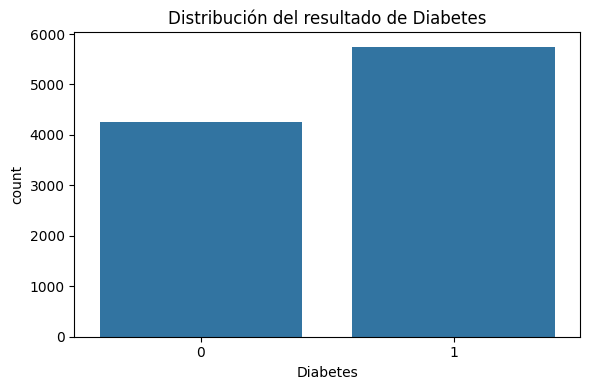

In [15]:
# Crear una nueva columna objetivo binaria 'Diabetes'
# Usando un umbral de 125 (típico para la glucosa en ayunas en mg/dL)
if 'Fasting_Blood_Glucose' in df.columns:
    df['Diabetes'] = df['Fasting_Blood_Glucose'].apply(lambda x: 1 if x > 125 else 0)
    print('Columna objetivo Diabetes creada basada en Fasting_Blood_Glucose.')
else:
    print('Columna Fasting_Blood_Glucose no encontrada. Por favor, revise el conjunto de datos.')

# Examinar la distribución del nuevo objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes', data=df)
plt.title('Distribución del resultado de Diabetes')
plt.tight_layout()
plt.show()


In [16]:
numerical_cols = ['Age', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 
                 'HbA1c', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
                 'Cholesterol_Total', 'Cholesterol_HDL', 'Cholesterol_LDL', 
                 'GGT', 'Serum_Urate', 'Dietary_Intake_Calories',
                 'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes', 'Diabetes']

categorical_cols = ['Sex', 'Ethnicity', 'Physical_Activity_Level', 
                   'Alcohol_Consumption', 'Smoking_Status']

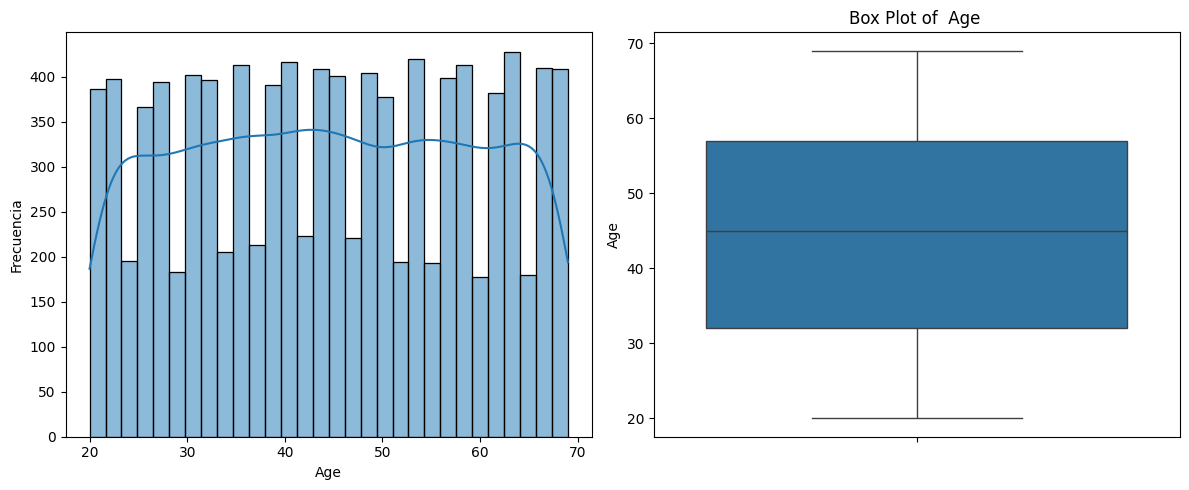


Estadísticas para Age:
Asimetría: -0.00
Valores faltantes: 0


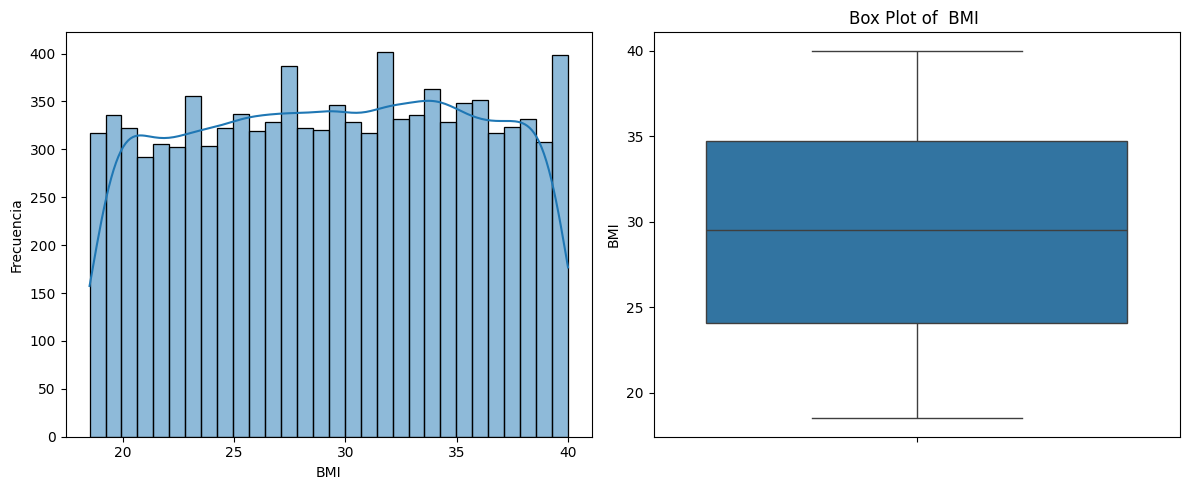


Estadísticas para BMI:
Asimetría: -0.03
Valores faltantes: 0


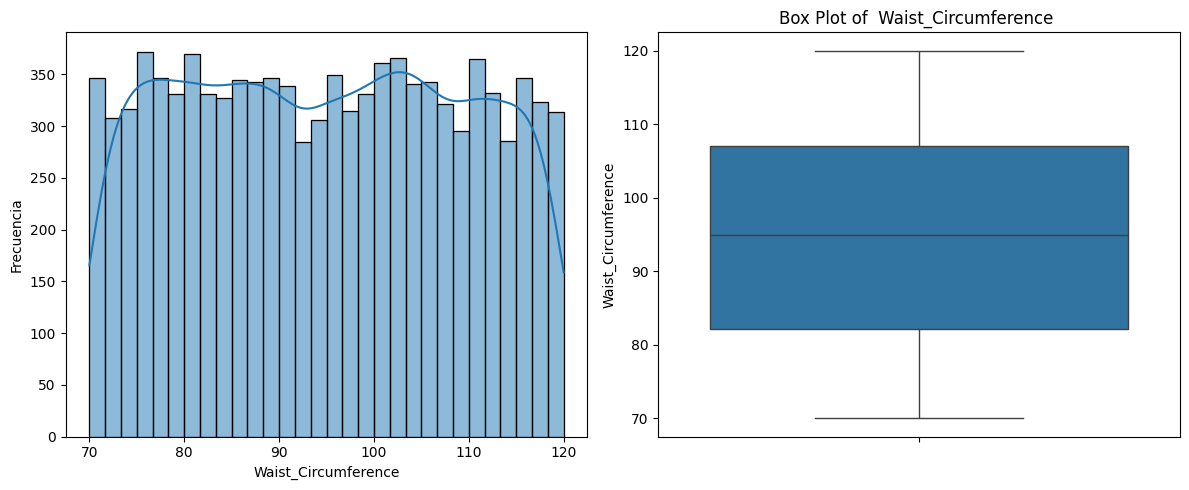


Estadísticas para Waist_Circumference:
Asimetría: 0.01
Valores faltantes: 0


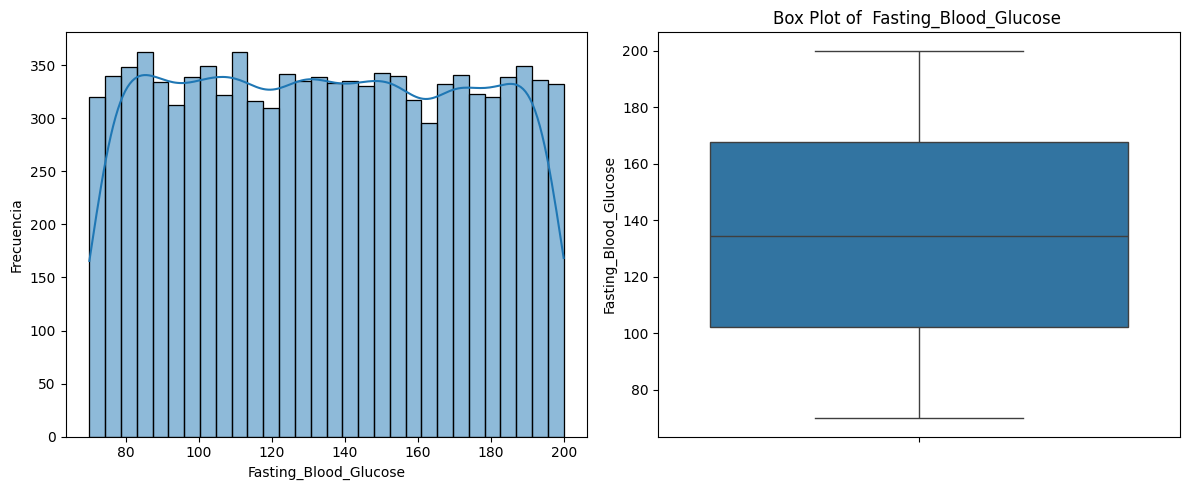


Estadísticas para Fasting_Blood_Glucose:
Asimetría: 0.01
Valores faltantes: 0


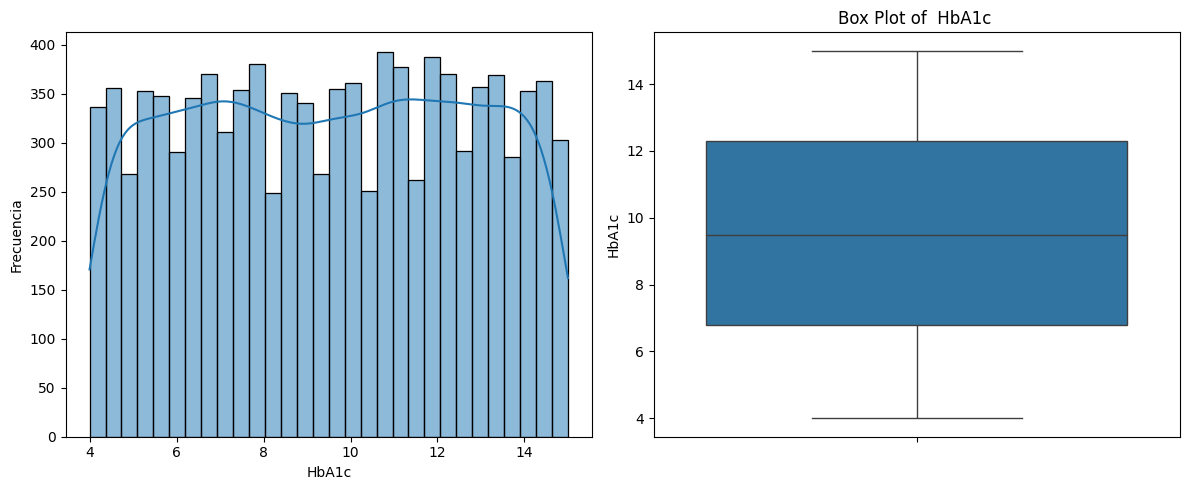


Estadísticas para HbA1c:
Asimetría: -0.01
Valores faltantes: 0


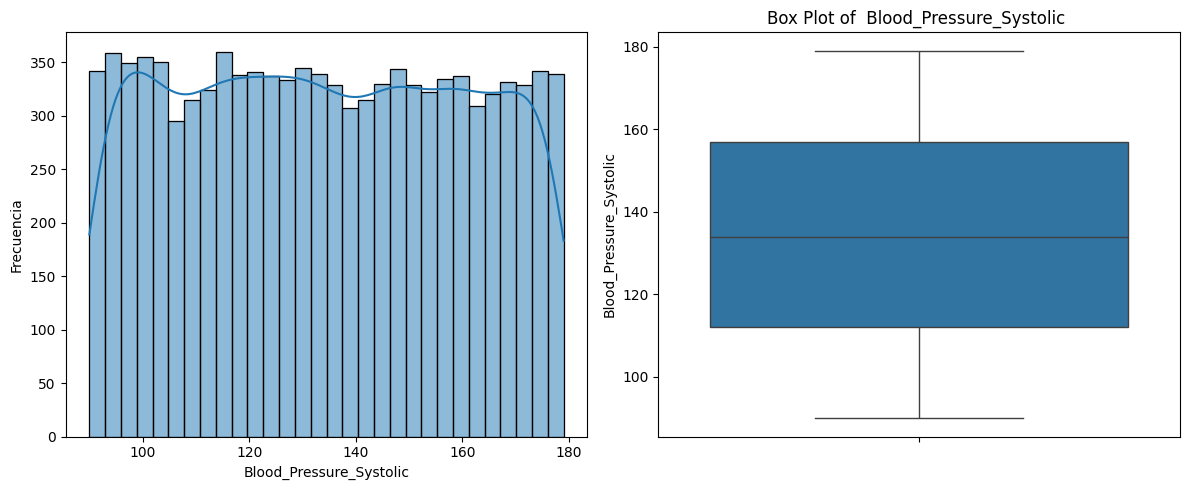


Estadísticas para Blood_Pressure_Systolic:
Asimetría: 0.02
Valores faltantes: 0


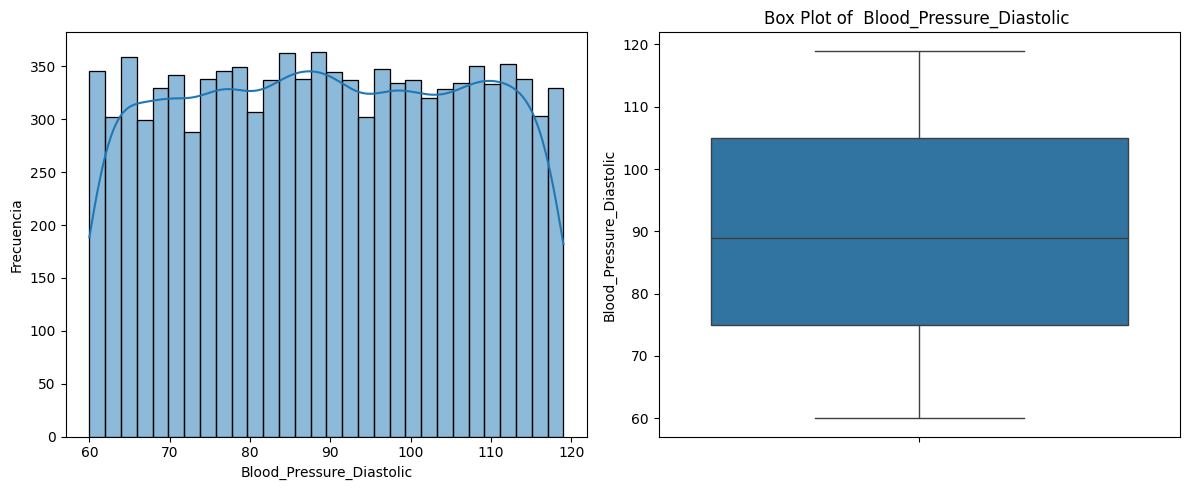


Estadísticas para Blood_Pressure_Diastolic:
Asimetría: -0.01
Valores faltantes: 0


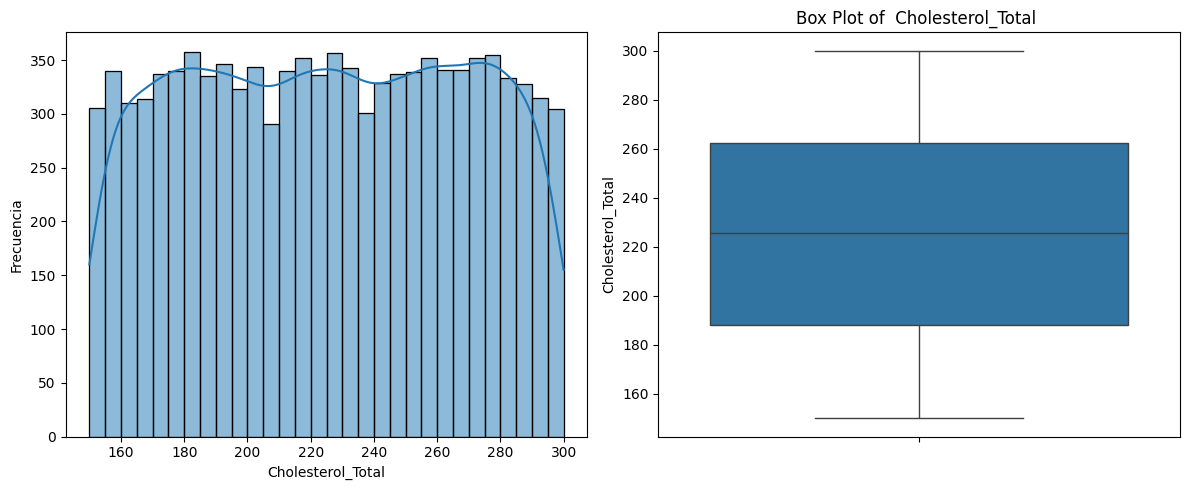


Estadísticas para Cholesterol_Total:
Asimetría: -0.01
Valores faltantes: 0


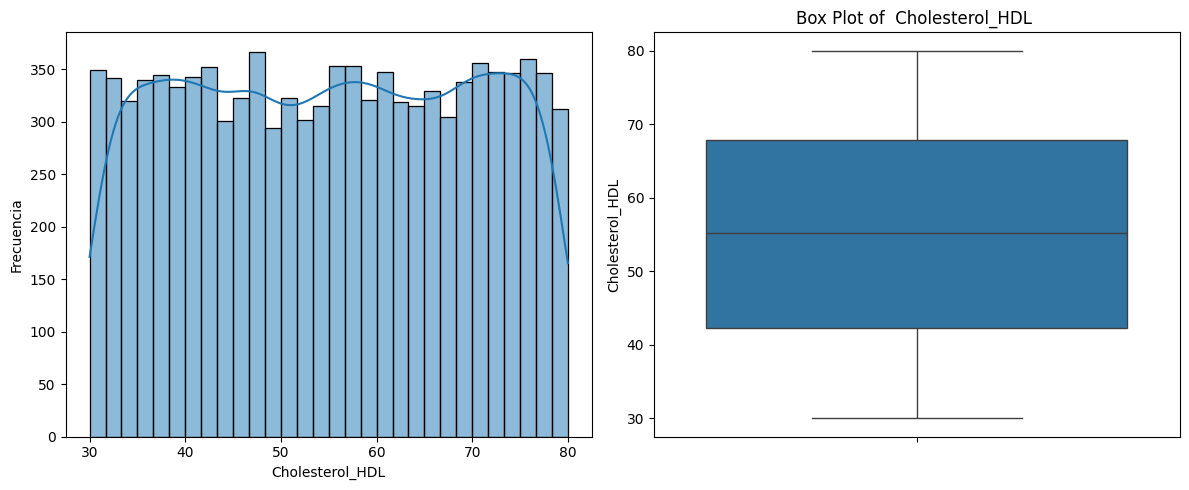


Estadísticas para Cholesterol_HDL:
Asimetría: -0.01
Valores faltantes: 0


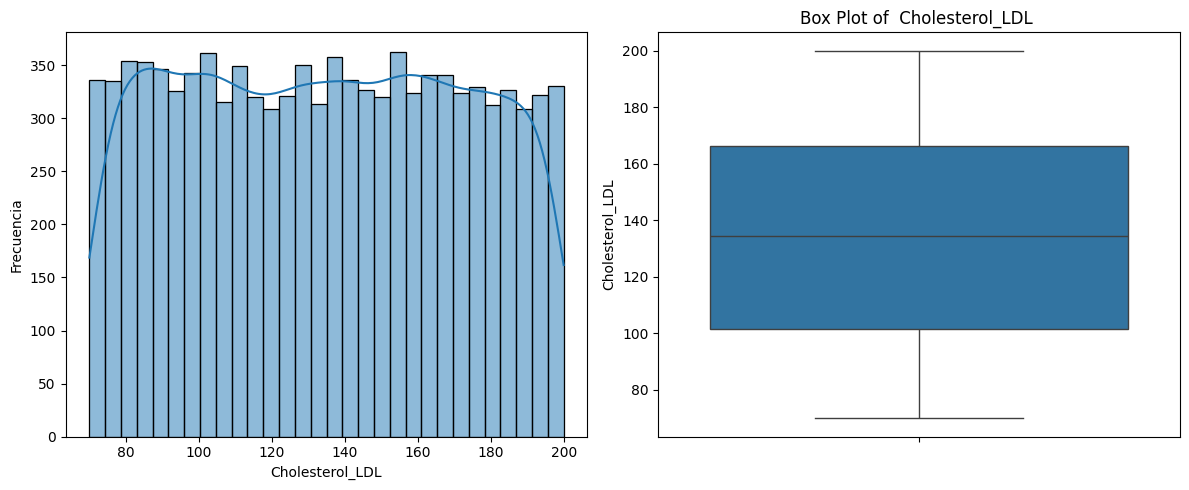


Estadísticas para Cholesterol_LDL:
Asimetría: 0.02
Valores faltantes: 0


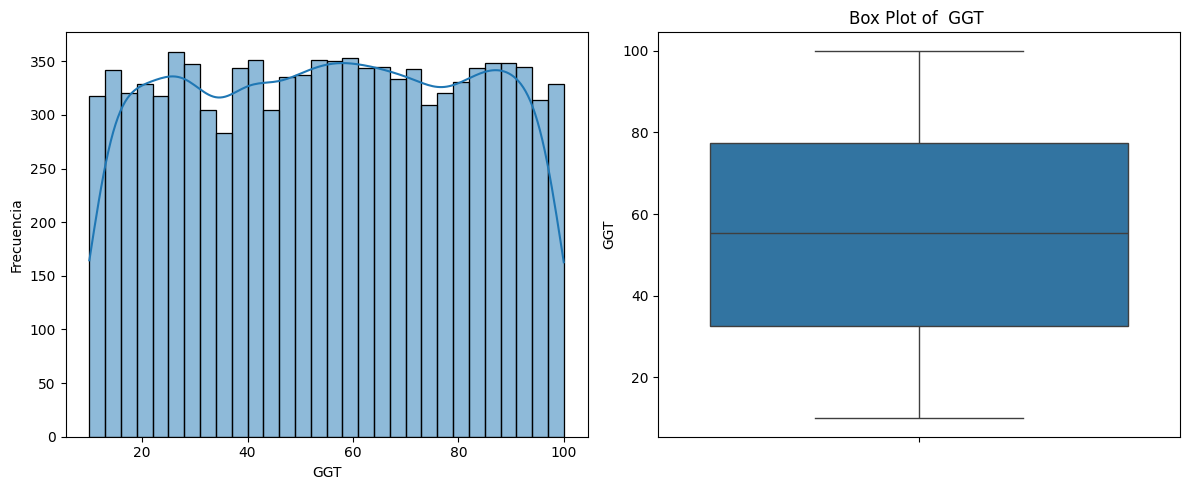


Estadísticas para GGT:
Asimetría: -0.01
Valores faltantes: 0


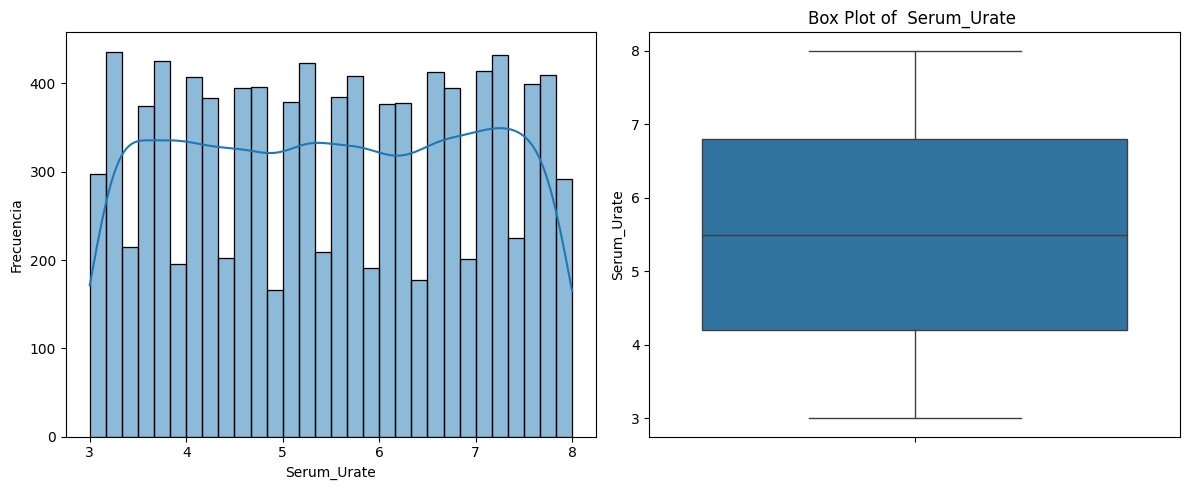


Estadísticas para Serum_Urate:
Asimetría: -0.01
Valores faltantes: 0


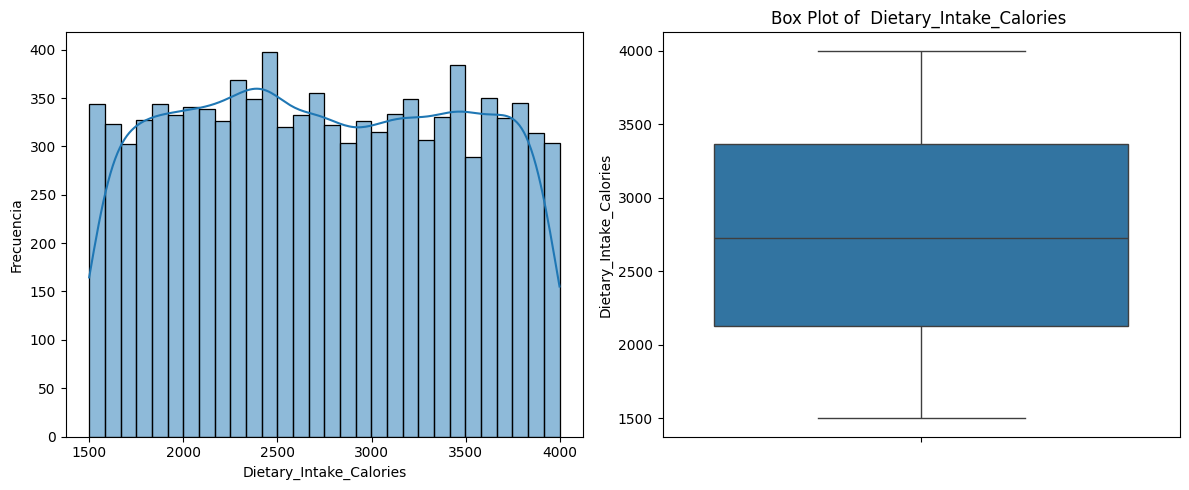


Estadísticas para Dietary_Intake_Calories:
Asimetría: 0.02
Valores faltantes: 0


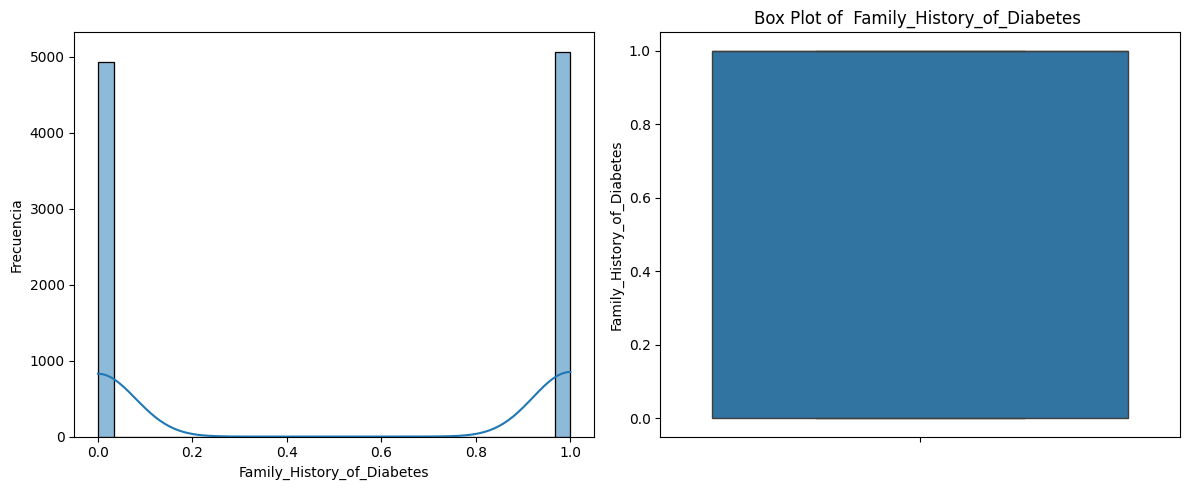


Estadísticas para Family_History_of_Diabetes:
Asimetría: -0.03
Valores faltantes: 0


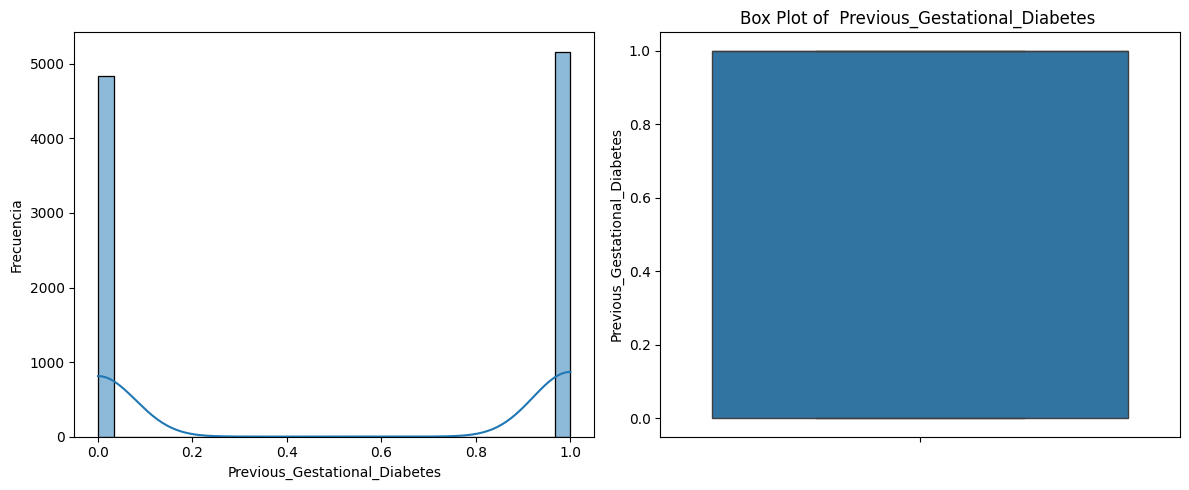


Estadísticas para Previous_Gestational_Diabetes:
Asimetría: -0.07
Valores faltantes: 0


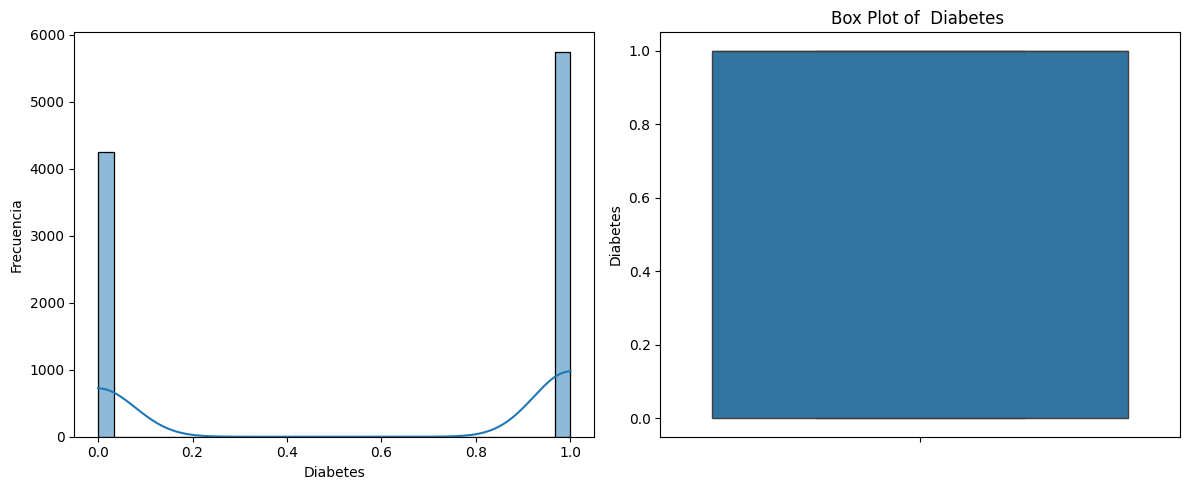


Estadísticas para Diabetes:
Asimetría: -0.30
Valores faltantes: 0


In [17]:
numerical_distro(df,numerical_cols)

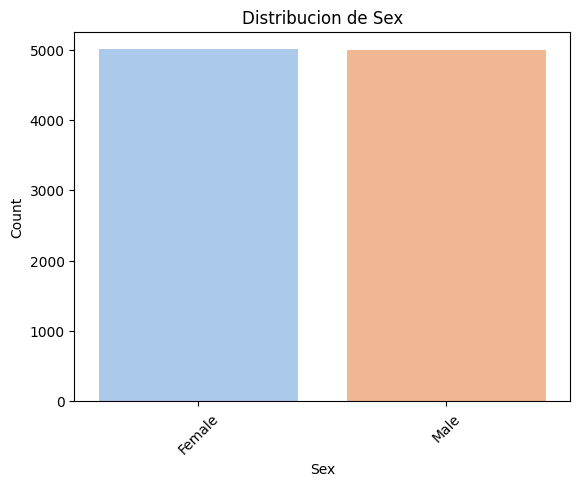

Característica: Sex
Número de valores únicos: 2
Valores faltantes: 0



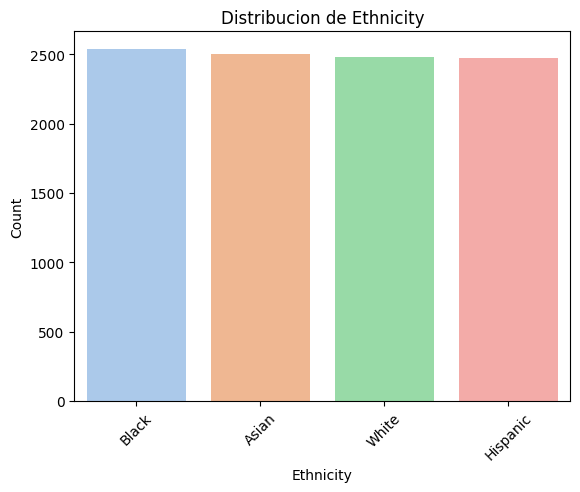

Característica: Ethnicity
Número de valores únicos: 4
Valores faltantes: 0



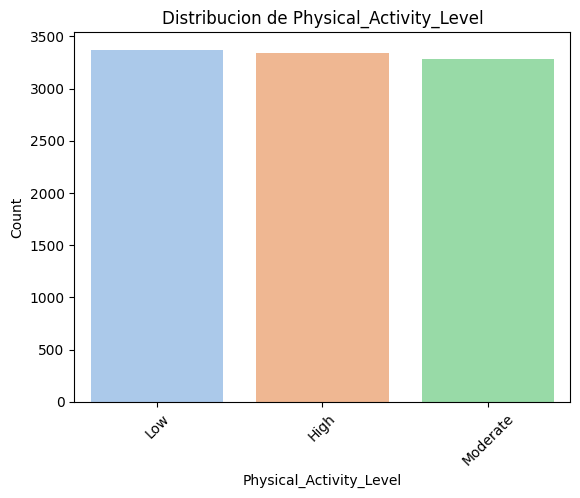

Característica: Physical_Activity_Level
Número de valores únicos: 3
Valores faltantes: 0



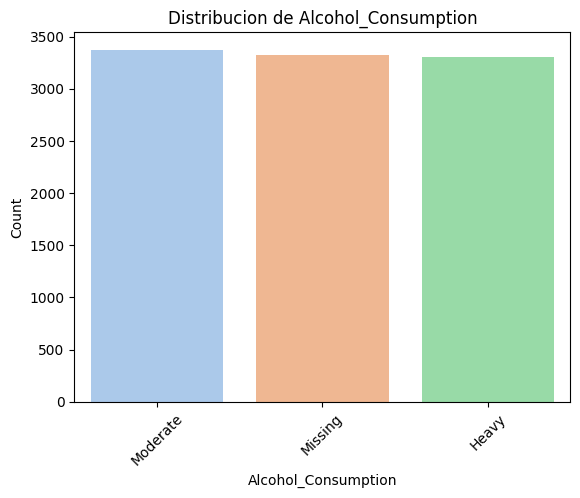

Característica: Alcohol_Consumption
Número de valores únicos: 3
Valores faltantes: 0



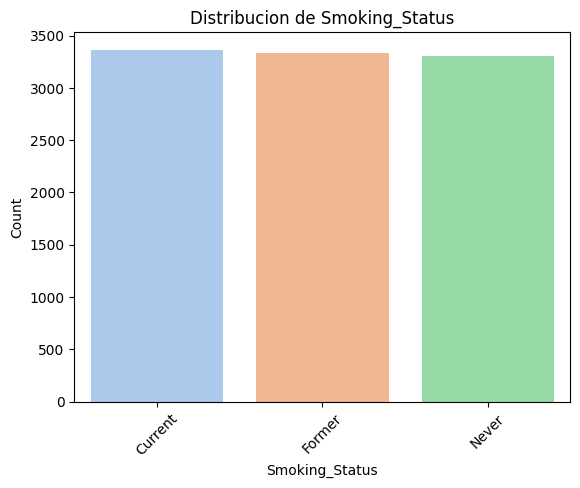

Característica: Smoking_Status
Número de valores únicos: 3
Valores faltantes: 0



In [18]:
categorical_distro(df,categorical_cols)

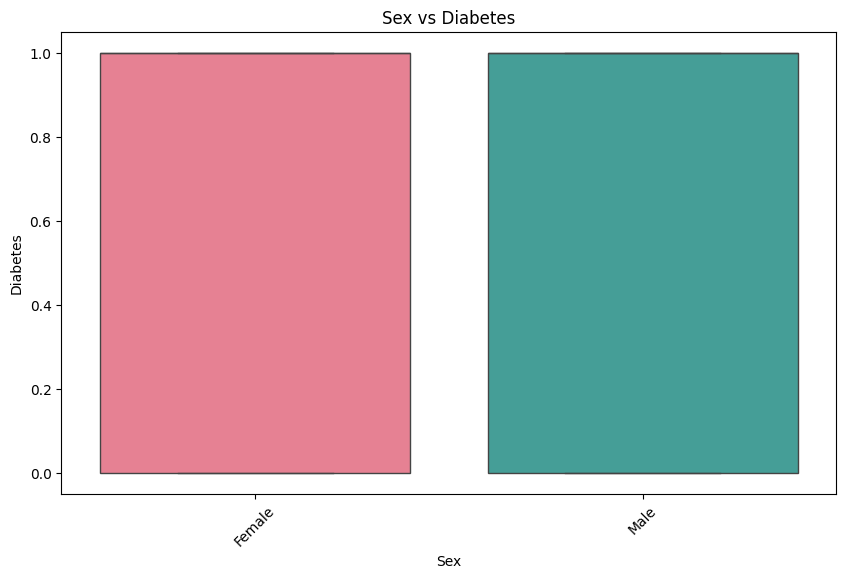

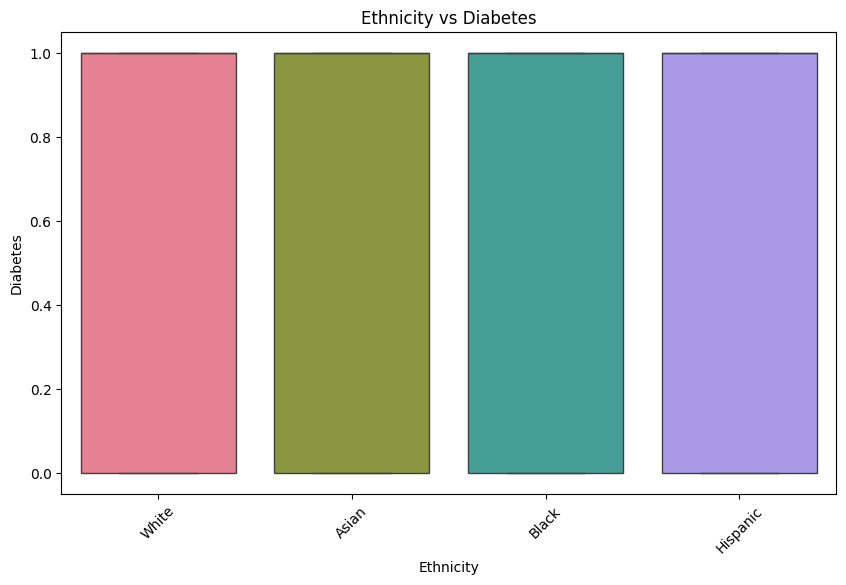

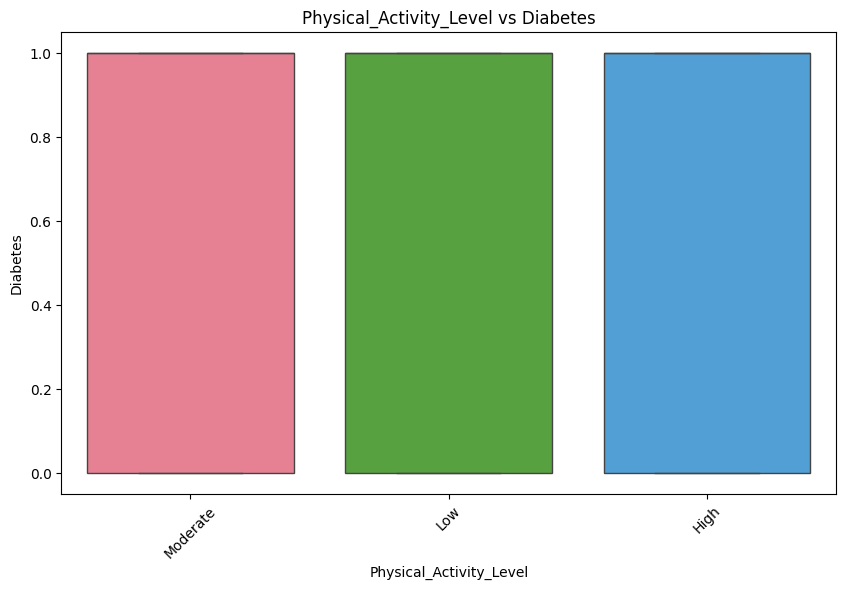

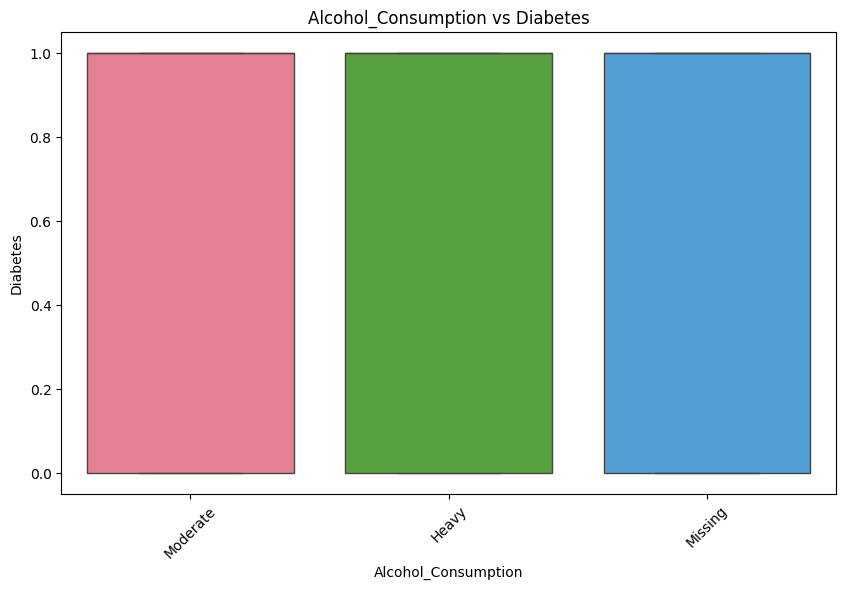

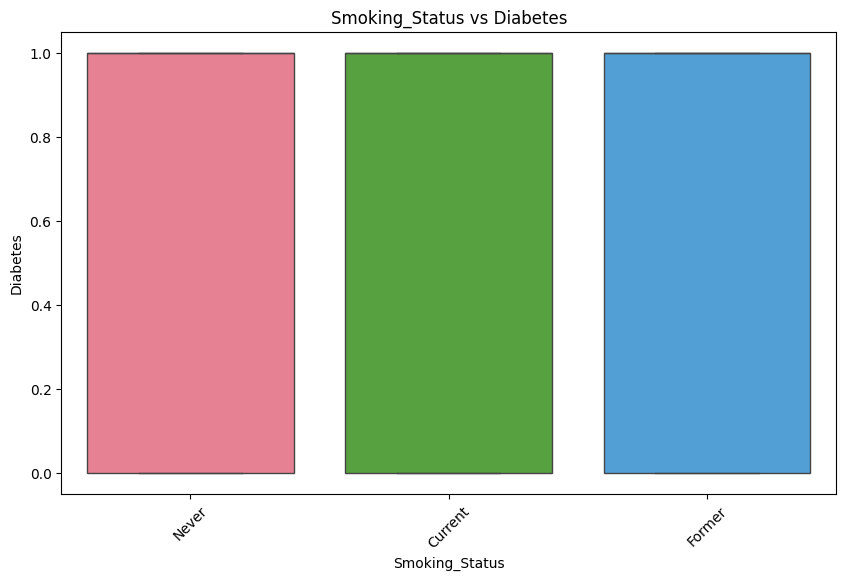

In [19]:
categorical_correlation_analysis(df,categorical_cols,'Diabetes')

### 2. Visualización de relaciones

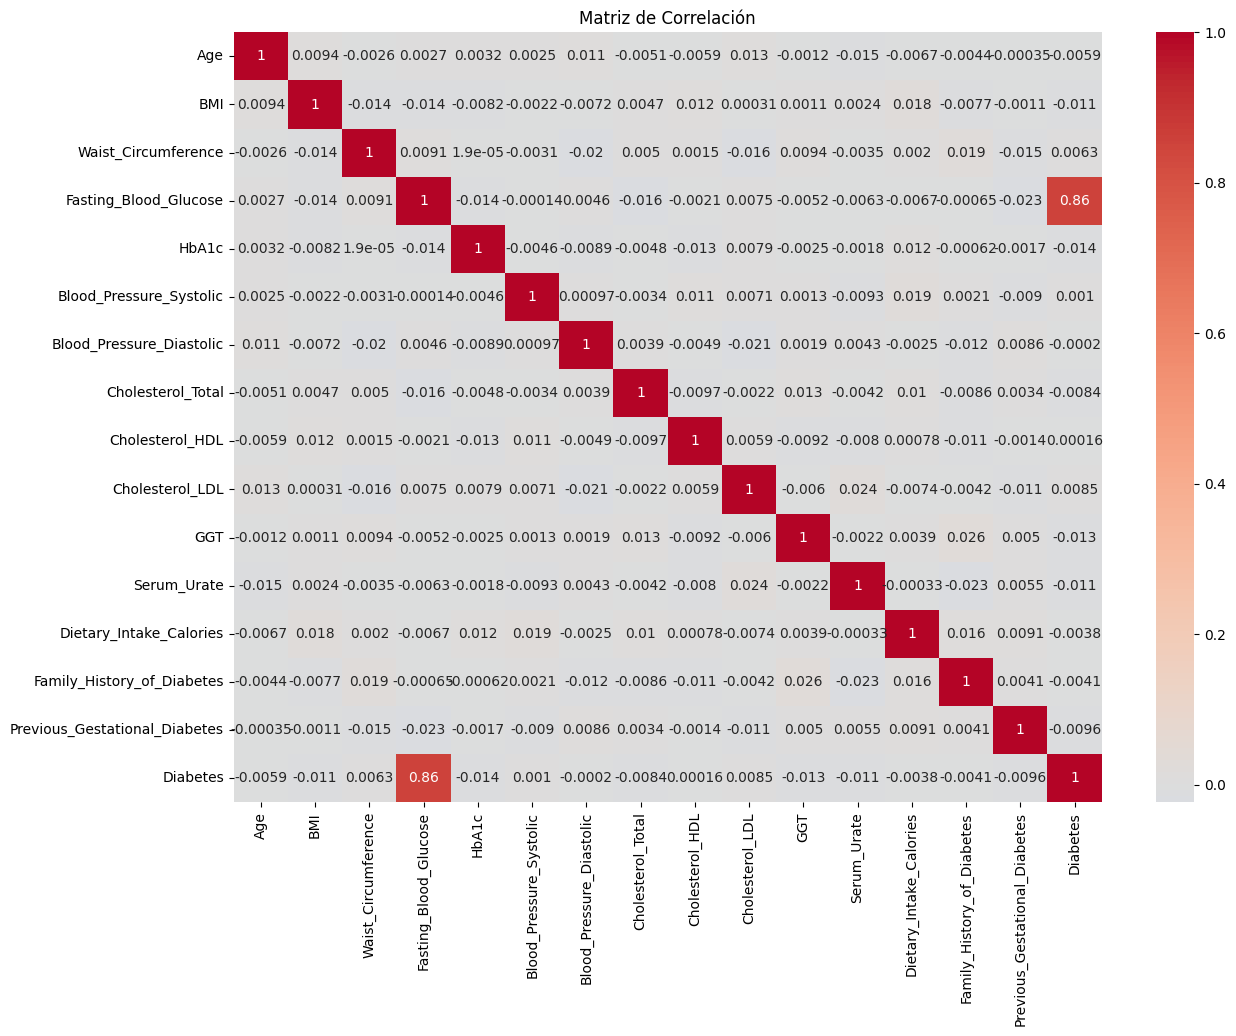

In [20]:
# Matriz de correlación para variables numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [21]:
# --------------------------
# RESUMEN FINAL
# --------------------------
print("\nResumen final del dataset limpio:")
print(df.isnull().sum())
print('-'*60)
print('-'*60)
print(df['Alcohol_Consumption'].unique())


Resumen final del dataset limpio:
Age                              0
Sex                              0
Ethnicity                        0
BMI                              0
Waist_Circumference              0
Fasting_Blood_Glucose            0
HbA1c                            0
Blood_Pressure_Systolic          0
Blood_Pressure_Diastolic         0
Cholesterol_Total                0
Cholesterol_HDL                  0
Cholesterol_LDL                  0
GGT                              0
Serum_Urate                      0
Physical_Activity_Level          0
Dietary_Intake_Calories          0
Alcohol_Consumption              0
Smoking_Status                   0
Family_History_of_Diabetes       0
Previous_Gestational_Diabetes    0
Diabetes                         0
dtype: int64
------------------------------------------------------------
------------------------------------------------------------
['Moderate' 'Heavy' 'Missing']


# Preprocesamiento de Datos

### Generación de Nuevas Variables a partir de Datos Existentes

In [22]:
df['BMI_Category'] = pd.cut(
    df['BMI'], 
    bins=[0, 18.5, 25, 30, 100],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

In [23]:
df['Total_HDL_Ratio'] = df['Cholesterol_Total'] / df['Cholesterol_HDL']

In [24]:
df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[0, 30, 45, 60, 75, 100],
    labels=['<30', '30-45', '45-60', '60-75', '75+']
)

In [25]:
# División en características y objetivo
X = df.drop('Diabetes',axis=1)
y = df['Diabetes']

Este bloque de código realiza la transformación de datos para preparar el conjunto de datos para su análisis o modelado:

1. Categoriza el índice de masa corporal (BMI) en categorías de peso: bajo peso, normal, sobrepeso y obesidad.

2. Calcula la relación entre el colesterol total y el colesterol HDL para evaluar la salud cardiovascular.

3. Clasifica las edades en grupos de rangos: menores de 30, 30-45, 45-60, 60-75 y mayores de 75 años.

4. Prepara las características (X) y la variable objetivo (y) para el modelado, separando las columnas del conjunto de datos en variables predictoras y la variable objetivo Diabetes.

In [26]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (8000, 23)
Tamaño del conjunto de prueba: (2000, 23)


In [27]:
categorical_features = ['Sex', 'Ethnicity', 'Physical_Activity_Level', 
                   'Alcohol_Consumption', 'Smoking_Status','BMI_Category',
                   'Age_Group']
df[categorical_features]

,Sex,Ethnicity,Physical_Activity_Level,Alcohol_Consumption,Smoking_Status,BMI_Category,Age_Group
0,Female,White,Moderate,Moderate,Never,Obese,45-60
1,Male,Asian,Moderate,Moderate,Current,Normal,45-60
2,Female,Black,Low,Heavy,Former,Normal,30-45
3,Male,Asian,Low,Moderate,Never,Obese,60-75
4,Female,Asian,Moderate,Heavy,Current,Obese,<30
...,...,...,...,...,...,...,...
9995,Female,Asian,Low,Missing,Former,Obese,30-45
9996,Female,Asian,Low,Missing,Never,Normal,30-45
9997,Female,Asian,High,Heavy,Former,Overweight,45-60
9998,Female,White,High,Moderate,Never,Overweight,60-75


### Codificación de características categóricas mediante LabelEncoder

Se aplica LabelEncoder a las características categóricas para transformarlas en valores numéricos, tanto en el conjunto de entrenamiento como en el de prueba.

In [28]:
categorical_features = ['Sex', 'Ethnicity', 'Physical_Activity_Level', 
                   'Alcohol_Consumption', 'Smoking_Status','BMI_Category',
                   'Age_Group']

# Codificador para datos categóricos
label_encoders = {col: LabelEncoder() for col in categorical_features}

# Aplicar LabelEncoder a cada columna categórica
for col in categorical_features:
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    X_test[col] = label_encoders[col].transform(X_test[col])

    # Converting to category type 
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

### Escalado de características

In [29]:
ss = StandardScaler()

X_train_scaled= ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Implementación de Clasificadores

### Modelo 1: Árbol de Decisión


MODELO: ÁRBOL DE DECISIÓN

Matriz de Confusión (Árbol de Decisión):
[[ 857    0]
 [   0 1143]]


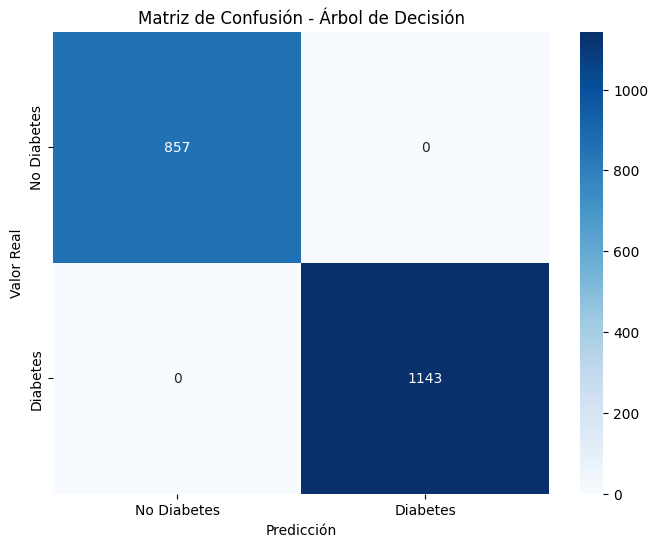


Reporte de Clasificación (Árbol de Decisión):
              precision    recall  f1-score   support

 No Diabetes       1.00      1.00      1.00       857
    Diabetes       1.00      1.00      1.00      1143

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Importancia de características (Árbol de Decisión):
Age: 0.0010
Sex: 0.0000
Ethnicity: 0.0000
BMI: 0.0000
Waist_Circumference: 0.0000
Fasting_Blood_Glucose: 0.9975
HbA1c: 0.0000
Blood_Pressure_Systolic: 0.0000
Blood_Pressure_Diastolic: 0.0000
Cholesterol_Total: 0.0000
Cholesterol_HDL: 0.0000
Cholesterol_LDL: 0.0000
GGT: 0.0011
Serum_Urate: 0.0000
Physical_Activity_Level: 0.0000
Dietary_Intake_Calories: 0.0000
Alcohol_Consumption: 0.0000
Smoking_Status: 0.0000
Family_History_of_Diabetes: 0.0000
Previous_Gestational_Diabetes: 0.0000
BMI_Category: 0.0000
Total_HDL_Ratio: 0.0000
Age_Group: 0.0004

Métricas adicionales:
Pr

In [30]:
print("\n" + "="*50)
print("MODELO: ÁRBOL DE DECISIÓN")
print("="*50)

# Entrenamiento del modelo con datos escalados
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)
tree.fit(X_train_scaled, y_train)  # Usar X_train_scaled

# Predicciones con datos escalados
y_pred_tree = tree.predict(X_test_scaled)  # Usar X_test_scaled

# Evaluación
print("\nMatriz de Confusión (Árbol de Decisión):")
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(conf_matrix_tree)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.savefig('confusion_matrix_tree.png')
plt.show()

print("\nReporte de Clasificación (Árbol de Decisión):")
print(classification_report(y_test, y_pred_tree, target_names=['No Diabetes', 'Diabetes']))

# Importancia de características
print("\nImportancia de características (Árbol de Decisión):")
for name, importance in zip(X.columns, tree.feature_importances_):
    print(f"{name}: {importance:.4f}")

# Métricas adicionales
print("\nMétricas adicionales:")
print(f"Precisión: {precision_score(y_test, y_pred_tree):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tree):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tree):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_tree):.4f}")


### Modelo 2: SVM


MODELO: SUPPORT VECTOR MACHINE (SVM)
Entrenando modelo SVM...

Tiempo de entrenamiento: 0.29 segundos
Tiempo de predicción: 0.03 segundos

Matriz de Confusión (SVM):
[[ 837   20]
 [  19 1124]]


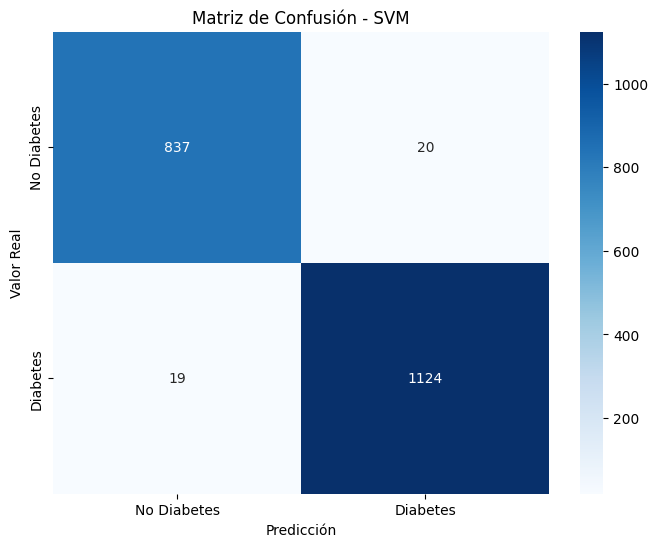


Reporte de Clasificación (SVM):
              precision    recall  f1-score   support

 No Diabetes       0.98      0.98      0.98       857
    Diabetes       0.98      0.98      0.98      1143

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000


Métricas adicionales:
Precisión: 0.9825
Recall/Sensibilidad: 0.9834
F1-Score: 0.9829
AUC-ROC: 0.9800


In [31]:
print("\n" + "="*50)
print("MODELO: SUPPORT VECTOR MACHINE (SVM)")
print("="*50)

# Configuración del modelo SVM
svm = SVC(
    kernel='poly',
    degree=3, 
    C=5.0,
    gamma='auto',
    coef0=1.0,
    random_state=42,
    cache_size=500,
    shrinking=True,
    tol=0.01
)

# Entrenamiento con datos escalados
start_time = time.time()
print("Entrenando modelo SVM...")
svm.fit(X_train_scaled, y_train)  # Usar X_train_scaled
train_time = time.time() - start_time
print(f"\nTiempo de entrenamiento: {train_time:.2f} segundos")

# Predicciones con datos escalados
start_time = time.time()
y_pred_svm = svm.predict(X_test_scaled)  # Usar X_test_scaled
predict_time = time.time() - start_time
print(f"Tiempo de predicción: {predict_time:.2f} segundos")

# Evaluación
print("\nMatriz de Confusión (SVM):")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix_svm)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - SVM')
plt.savefig('confusion_matrix_svm.png')
plt.show()

# Reporte de clasificación
print("\nReporte de Clasificación (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=['No Diabetes', 'Diabetes']))

# Métricas adicionales
print("\nMétricas adicionales:")
print(f"Precisión: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall/Sensibilidad: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_svm):.4f}")


### Modelo 3: Random Forest


MODELO: RANDOM FOREST
Entrenando modelo Random Forest...
Tiempo de entrenamiento: 0.63 segundos
Tiempo de predicción: 0.02 segundos

Matriz de Confusión (Random Forest):
[[ 857    0]
 [   0 1143]]


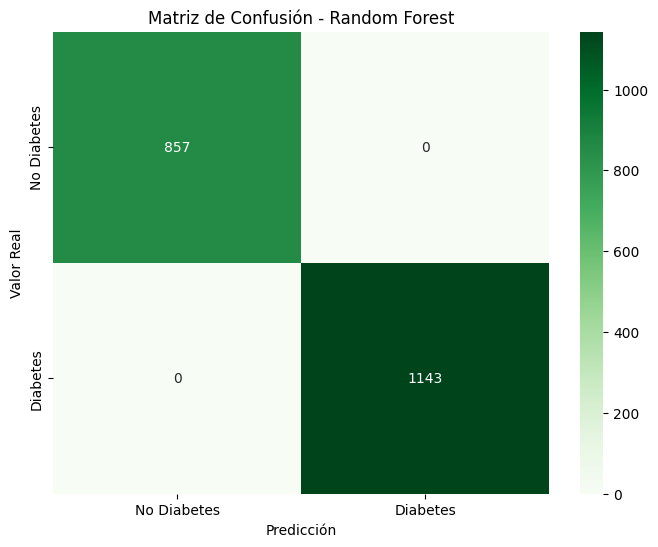


Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

 No Diabetes       1.00      1.00      1.00       857
    Diabetes       1.00      1.00      1.00      1143

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Métricas adicionales:
Precisión: 1.0000
Recall: 1.0000
F1-Score: 1.0000
AUC-ROC: 1.0000


In [32]:
print("\n" + "="*50)
print("MODELO: RANDOM FOREST")
print("="*50)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Configuración del modelo
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Entrenamiento
start_time = time.time()
print("Entrenando modelo Random Forest...")
rf.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Tiempo de entrenamiento: {train_time:.2f} segundos")

# Predicción
start_time = time.time()
y_pred_rf = rf.predict(X_test)
predict_time = time.time() - start_time
print(f"Tiempo de predicción: {predict_time:.2f} segundos")

# Evaluación
print("\nMatriz de Confusión (Random Forest):")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Random Forest')
plt.savefig('confusion_matrix_rf.png')
plt.show()

# Métricas
print("\nReporte de Clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=['No Diabetes', 'Diabetes']))

print("\nMétricas adicionales:")
print(f"Precisión: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_rf):.4f}")


# Comparación Experimental

In [33]:
metrics = {
    'Modelo': ['Árbol de Decisión', 'SVM', 'Random Forest'],
    'Precisión': [
        precision_score(y_test, y_pred_tree),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_rf)
    ],
    'Recall': [
        recall_score(y_test, y_pred_tree),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_rf)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_tree),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_rf)
    ],
    'AUC-ROC': [
        roc_auc_score(y_test, y_pred_tree),
        roc_auc_score(y_test, y_pred_svm),
        roc_auc_score(y_test, y_pred_rf)
    ]
}

# Convertir el diccionario en un DataFrame
metrics_df = pd.DataFrame(metrics)

# Tabla comparativa
print(metrics_df)

              Modelo  Precisión    Recall  F1-Score  AUC-ROC
0  Árbol de Decisión   1.000000  1.000000  1.000000  1.00000
1                SVM   0.982517  0.983377  0.982947  0.98002
2      Random Forest   1.000000  1.000000  1.000000  1.00000


SVM (poly, C=5.0): Accuracy promedio = 0.976, Desviación Estándar = 0.002
Árbol de Decisión: Accuracy promedio = 0.926, Desviación Estándar = 0.147
Random Forest: Accuracy promedio = 1.000, Desviación Estándar = 0.000

Resumen de validación cruzada:
              Modelo  Accuracy Promedio  Desviación Estándar
0  SVM (poly, C=5.0)            0.97625             0.002016
1  Árbol de Decisión            0.92600             0.147063
2      Random Forest            1.00000             0.000000


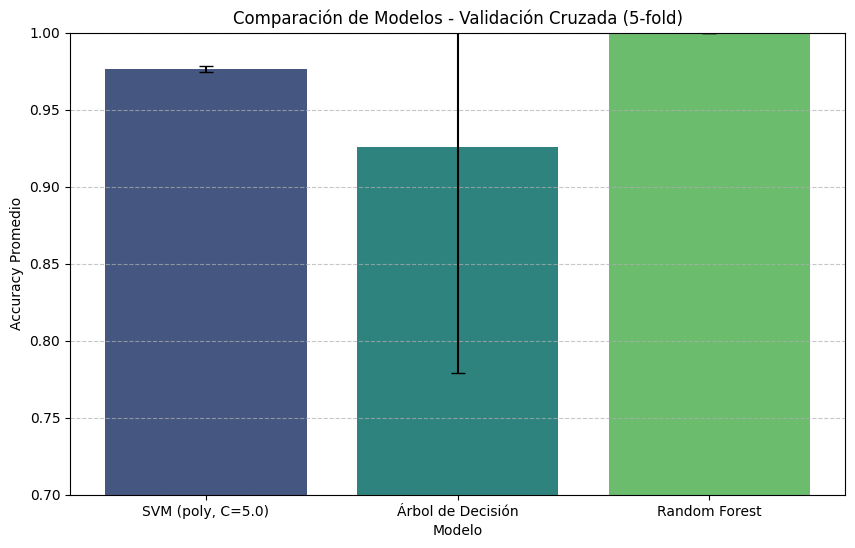

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definición de los modelos a comparar
models = {
    'SVM (poly, C=5.0)': SVC(kernel='poly', degree=3, C=5.0, gamma='auto', coef0=1.0, random_state=42),
    'Árbol de Decisión': DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                                                min_samples_leaf=5, max_features='sqrt', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
}

# Lista para almacenar los resultados de la validación cruzada
cv_results = []

# Realización de la validación cruzada
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_results.append({
        'Modelo': name,
        'Accuracy Promedio': scores.mean(),
        'Desviación Estándar': scores.std(),
        'Scores': scores
    })
    print(f"{name}: Accuracy promedio = {scores.mean():.3f}, Desviación Estándar = {scores.std():.3f}")

# Resumen de los resultados de validación cruzada en un DataFrame
cv_df = pd.DataFrame(cv_results)[['Modelo', 'Accuracy Promedio', 'Desviación Estándar']]
print("\nResumen de validación cruzada:")
print(cv_df)

# Visualización de los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Accuracy Promedio', data=cv_df, palette='viridis')
plt.errorbar(x=range(len(cv_df)), y=cv_df['Accuracy Promedio'],
             yerr=cv_df['Desviación Estándar'], fmt='none', color='black', capsize=5)
plt.title('Comparación de Modelos - Validación Cruzada (5-fold)')
plt.ylim(0.7, 1.0)  # Ajustar según los resultados
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('cross_validation_comparison.png')  # Guardar la imagen si lo deseas
plt.show()



VISUALIZACIÓN DE FRONTERAS DE DECISIÓN
Preparando visualización con 2 dimensiones (Age y Fasting Blood Glucose)...
Generando visualizaciones de fronteras de decisión...


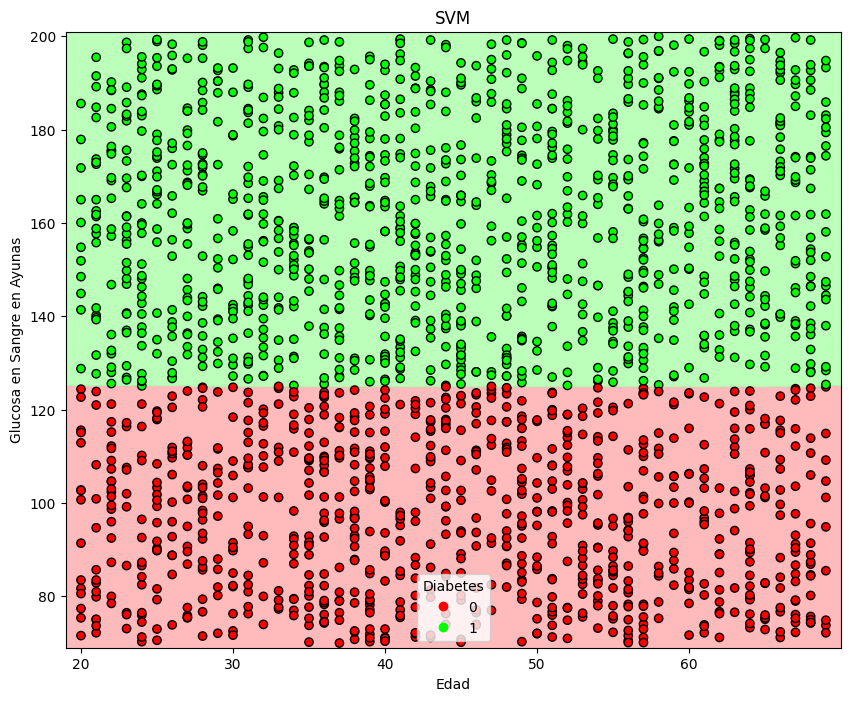

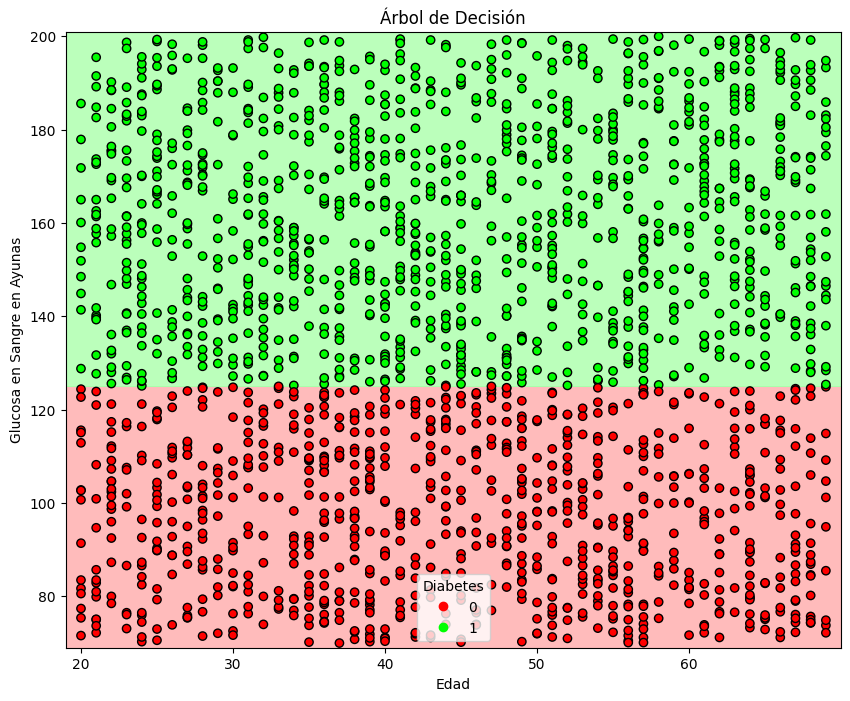

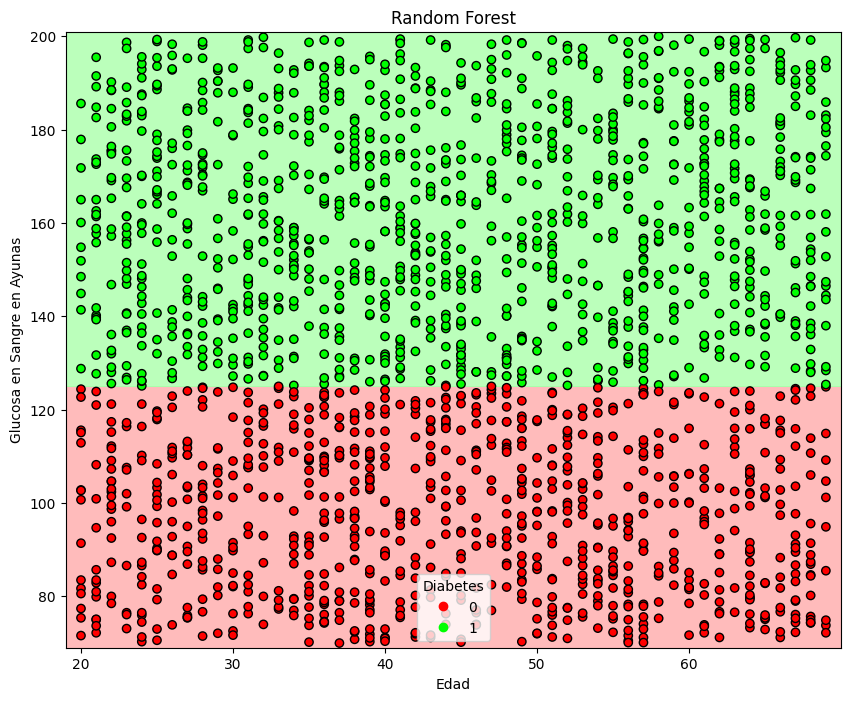

In [35]:
# Visualización de fronteras de decisión
print("\n" + "="*50)
print("VISUALIZACIÓN DE FRONTERAS DE DECISIÓN")
print("="*50)

# Para visualizar las fronteras de decisión, vamos a elegir dos características
print("Preparando visualización con 2 dimensiones (Age y Fasting Blood Glucose)...")

# Seleccionamos solo Age y Fasting Blood Glucose del conjunto de entrenamiento
X_train_2d = X_train[['Age', 'Fasting_Blood_Glucose']].values
X_test_2d = X_test[['Age', 'Fasting_Blood_Glucose']].values

# Entrenamos modelos con solo 2 dimensiones para la visualización
svm_2d = SVC(kernel='poly', degree=3, C=5.0, gamma='auto', coef0=1.0, random_state=42)
tree_2d = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_2d = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Entrenamos estos modelos simplificados
svm_2d.fit(X_train_2d, y_train)
tree_2d.fit(X_train_2d, y_train)
rf_2d.fit(X_train_2d, y_train)

def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir con el modelo
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))

    # Graficar los puntos de entrenamiento
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00']))

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Edad')
    plt.ylabel('Glucosa en Sangre en Ayunas')
    plt.legend(*scatter.legend_elements(), title="Diabetes")
    plt.savefig(f'decision_boundary_{title.replace(" ", "_").lower()}.png')
    plt.show()

# Visualizar fronteras de decisión para cada modelo (usando solo 2 dimensiones)
print("Generando visualizaciones de fronteras de decisión...")
plot_decision_boundary(svm_2d, X_test_2d, y_test, "SVM")
plot_decision_boundary(tree_2d, X_test_2d, y_test, "Árbol de Decisión")
plot_decision_boundary(rf_2d, X_test_2d, y_test, "Random Forest")
